In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

df = pd.read_csv('data.csv', sep = ';')

In [2]:
df.shape

(133, 28)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            133 non-null    object 
 1   population         133 non-null    int64  
 2   area               133 non-null    int64  
 3   density_pop        133 non-null    float64
 4   coastline          133 non-null    float64
 5   migration          133 non-null    float64
 6   Infant_mortality   133 non-null    float64
 7   gdp                133 non-null    int64  
 8   literacy           131 non-null    float64
 9   phones             132 non-null    float64
 10  arable             133 non-null    float64
 11  crops              133 non-null    float64
 12  other              133 non-null    float64
 13  climate            118 non-null    float64
 14  birthrate          132 non-null    float64
 15  death rate         132 non-null    float64
 16  agriculture        133 non

<AxesSubplot:>

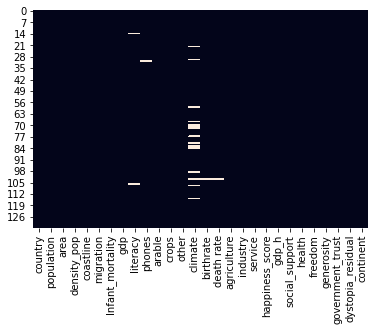

In [4]:
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df.describe()

,population,area,density_pop,coastline,migration,Infant_mortality,gdp,literacy,phones,arable,...,industry,service,happiness_score,gdp_h,social_support,health,freedom,generosity,government_trust,dystopia_residual
count,1.330000e+02,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,131.000000,132.00000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,4.686638e+07,9.272865e+05,172.975188,2.214060,0.234436,37.610376,9936.842105,82.414504,208.32803,16.803383,...,248.260752,431.391203,5.564014,0.889411,1.172835,0.716407,0.470728,0.184463,0.133519,1.996649
std,1.515015e+08,2.262120e+06,581.853666,6.661936,3.456684,35.494132,10652.147839,20.378892,202.76960,14.460712,...,156.105524,256.972454,1.110467,0.367412,0.276631,0.234283,0.140009,0.096655,0.117272,0.546397
min,2.993880e+05,3.160000e+02,1.800000,0.000000,-8.580000,2.290000,500.000000,17.600000,0.20000,0.070000,...,0.110000,0.210000,2.566900,0.000000,0.352428,0.108744,0.000000,0.000000,0.000000,0.257241
25%,5.042920e+06,7.028000e+04,29.300000,0.000000,-0.840000,7.870000,1900.000000,70.500000,33.07500,5.480000,...,188.000000,334.000000,4.784800,0.616799,1.001103,0.540570,0.382028,0.113999,0.056570,1.684905
50%,1.037907e+07,2.448200e+05,69.800000,0.240000,0.000000,24.180000,5800.000000,91.300000,140.35000,12.810000,...,275.000000,533.000000,5.607500,0.952680,1.226333,0.775857,0.495466,0.170612,0.098360,2.056798
75%,3.309893e+07,7.526140e+05,127.900000,1.260000,0.860000,61.810000,13900.000000,98.400000,334.40000,23.460000,...,326.000000,618.000000,6.304800,1.193560,1.395667,0.868038,0.586510,0.254325,0.163322,2.370968
max,1.313974e+09,1.707520e+07,6482.200000,62.280000,23.060000,163.070000,55100.000000,100.000000,898.00000,62.110000,...,666.000000,787.000000,7.808700,1.536676,1.547567,1.137814,0.693270,0.542647,0.533162,3.440810


In [6]:
df.corr().happiness_score.sort_values(ascending=False).head(20)

happiness_score      1.000000
health               0.778617
social_support       0.774504
gdp_h                0.773960
gdp                  0.755250
phones               0.752624
literacy             0.599654
freedom              0.583343
dystopia_residual    0.520327
government_trust     0.447371
climate              0.372086
service              0.341618
coastline            0.227353
migration            0.118847
generosity           0.113709
industry             0.109921
density_pop          0.087319
area                 0.075030
arable               0.021953
other                0.011737
Name: happiness_score, dtype: float64

In [7]:
df.corr().happiness_score.sort_values(ascending=True).head(10)

Infant_mortality   -0.727733
birthrate          -0.660259
death rate         -0.473985
agriculture        -0.452222
crops              -0.125149
population         -0.114028
other               0.011737
arable              0.021953
area                0.075030
density_pop         0.087319
Name: happiness_score, dtype: float64

## Features correlating with Happiness_score > 0.50:

'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
'phones',
'literacy',
'Infant_mortality',
'birthrate'

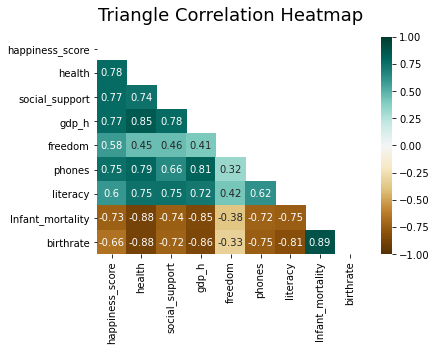

In [149]:
vs = [
    'happiness_score',
    'health',
'social_support',
'gdp_h',
'freedom',
'phones',
'literacy',
'Infant_mortality',
'birthrate',
]

df_c = df[vs]

dataframe = df_c
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Correlation Matrix for Happiness score report variables:

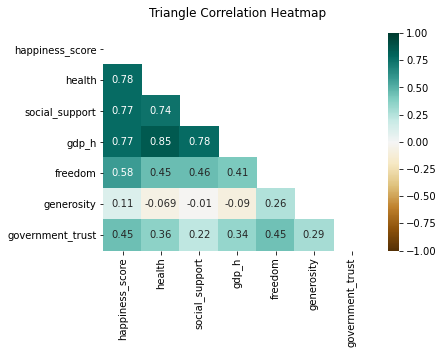

In [147]:
vs = [
    'happiness_score',
    'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
# 'phones',
# 'literacy',
# 'Infant_mortality',
# 'birthrate',
]

df_c = df[vs]

dataframe = df_c
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

### Correlation Matrix for features that highly correlate with happiness score removing variables with high covariance:

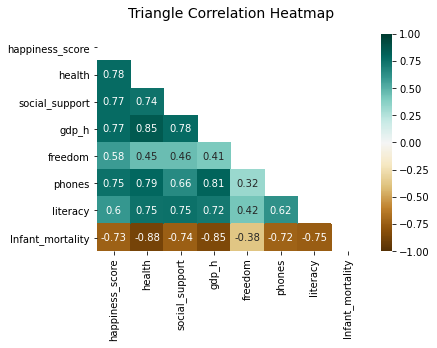

In [151]:
vs = [
    'happiness_score',
    'health',
'social_support',
'gdp_h',
'freedom',
'phones',
'literacy',
'Infant_mortality',
# 'birthrate',
]

df_c = df[vs]

dataframe = df_c
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16);

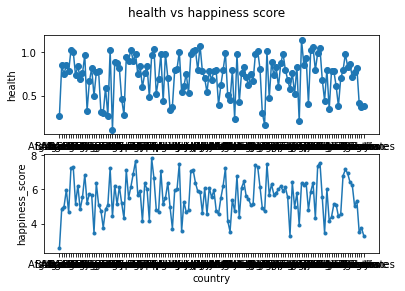

In [134]:
y1 = df['health']
x1 = df['country']

y2 = df['happiness_score']
x2 = df['country']

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('health vs happiness score')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('health')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('country')
ax2.set_ylabel('happiness_score')

plt.show()

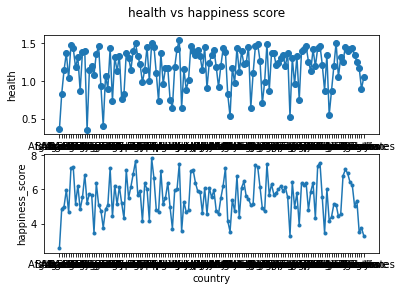

In [135]:
y1 = df['social_support']
x1 = df['country']

y2 = df['happiness_score']
x2 = df['country']

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('health vs happiness score')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('health')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('country')
ax2.set_ylabel('happiness_score')

plt.show()

## Preprocessing:

In [389]:
vs = [
    'country',
    'happiness_score',
    'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
'phones',
'literacy',
'Infant_mortality',
]

df= df[vs]

In [390]:
df = df.dropna()
df.shape

(130, 11)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           130 non-null    object 
 1   happiness_score   130 non-null    float64
 2   health            130 non-null    float64
 3   social_support    130 non-null    float64
 4   gdp_h             130 non-null    float64
 5   freedom           130 non-null    float64
 6   generosity        130 non-null    float64
 7   government_trust  130 non-null    float64
 8   phones            130 non-null    float64
 9   literacy          130 non-null    float64
 10  Infant_mortality  130 non-null    float64
dtypes: float64(10), object(1)
memory usage: 12.2+ KB


In [392]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,country,happiness_score,health,social_support,gdp_h,freedom,generosity,government_trust,phones,literacy,Infant_mortality
0,Afghanistan,2.5669,0.266052,0.356434,0.300706,0.000000,0.135235,0.001226,3.2,36.0,163.07
1,Albania,4.8827,0.846330,0.830484,0.906653,0.461946,0.171028,0.025361,71.2,86.5,21.52
2,Algeria,5.0051,0.745419,1.143004,0.943856,0.083944,0.118915,0.129191,78.1,70.0,31.00
3,Argentina,5.9747,0.849774,1.372544,1.028466,0.520840,0.070100,0.060415,220.4,97.1,15.18
4,Armenia,4.6768,0.775857,1.034577,0.808262,0.378076,0.107226,0.104618,195.7,98.6,23.28
...,...,...,...,...,...,...,...,...,...,...,...
125,Venezuela,5.0532,0.767026,1.348547,0.770239,0.271717,0.087179,0.063625,140.1,93.4,22.20
126,Vietnam,5.3535,0.819134,1.253075,0.718092,0.650836,0.136489,0.089848,187.7,90.3,25.95
127,Yemen,3.5274,0.415000,1.177477,0.392702,0.243721,0.094689,0.087352,37.2,50.2,61.50
128,Zambia,3.7594,0.363593,0.896037,0.536834,0.491318,0.250621,0.086705,8.2,80.6,88.29


In [393]:
# df.set_index('country', inplace = True)

In [394]:
f = ['happiness_score', 'country']
df_y = df[f]
df_y

,happiness_score,country
0,2.5669,Afghanistan
1,4.8827,Albania
2,5.0051,Algeria
3,5.9747,Argentina
4,4.6768,Armenia
...,...,...
125,5.0532,Venezuela
126,5.3535,Vietnam
127,3.5274,Yemen
128,3.7594,Zambia


In [395]:
f = [    
    'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
'phones',
'literacy',
'Infant_mortality'
    ]
df_X = df[f]
df_X

,health,social_support,gdp_h,freedom,generosity,government_trust,phones,literacy,Infant_mortality
0,0.266052,0.356434,0.300706,0.000000,0.135235,0.001226,3.2,36.0,163.07
1,0.846330,0.830484,0.906653,0.461946,0.171028,0.025361,71.2,86.5,21.52
2,0.745419,1.143004,0.943856,0.083944,0.118915,0.129191,78.1,70.0,31.00
3,0.849774,1.372544,1.028466,0.520840,0.070100,0.060415,220.4,97.1,15.18
4,0.775857,1.034577,0.808262,0.378076,0.107226,0.104618,195.7,98.6,23.28
...,...,...,...,...,...,...,...,...,...
125,0.767026,1.348547,0.770239,0.271717,0.087179,0.063625,140.1,93.4,22.20
126,0.819134,1.253075,0.718092,0.650836,0.136489,0.089848,187.7,90.3,25.95
127,0.415000,1.177477,0.392702,0.243721,0.094689,0.087352,37.2,50.2,61.50
128,0.363593,0.896037,0.536834,0.491318,0.250621,0.086705,8.2,80.6,88.29


In [396]:
from sklearn.preprocessing import MinMaxScaler

In [397]:
scaler = MinMaxScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns = df_X.columns)

In [398]:
df_X

,health,social_support,gdp_h,freedom,generosity,government_trust,phones,literacy,Infant_mortality
0,0.152864,0.003351,0.195686,0.000000,0.249213,0.002299,0.003342,0.223301,1.000000
1,0.716749,0.400000,0.590009,0.666329,0.315173,0.047568,0.079082,0.836165,0.119604
2,0.618689,0.661492,0.614219,0.121084,0.219139,0.242310,0.086768,0.635922,0.178567
3,0.720096,0.853554,0.669279,0.751280,0.129183,0.113315,0.245266,0.964806,0.080172
4,0.648268,0.570769,0.525981,0.545351,0.197598,0.196222,0.217755,0.983010,0.130551
...,...,...,...,...,...,...,...,...,...
125,0.639686,0.833475,0.501237,0.391935,0.160656,0.119335,0.155825,0.919903,0.123834
126,0.690322,0.753591,0.467302,0.938790,0.251524,0.168520,0.208844,0.882282,0.147158
127,0.297605,0.690337,0.255553,0.351553,0.174495,0.163838,0.041212,0.395631,0.368267
128,0.247650,0.454850,0.349347,0.708695,0.461849,0.162624,0.008911,0.764563,0.534892


In [399]:
df1 = pd.merge(df_X, df_y, left_index=True, right_index=True)

In [401]:
df1.set_index('country', inplace = True)

In [402]:
df1

,health,social_support,gdp_h,freedom,generosity,government_trust,phones,literacy,Infant_mortality,happiness_score
country,,,,,,,,,,
Afghanistan,0.152864,0.003351,0.195686,0.000000,0.249213,0.002299,0.003342,0.223301,1.000000,2.5669
Albania,0.716749,0.400000,0.590009,0.666329,0.315173,0.047568,0.079082,0.836165,0.119604,4.8827
Algeria,0.618689,0.661492,0.614219,0.121084,0.219139,0.242310,0.086768,0.635922,0.178567,5.0051
Argentina,0.720096,0.853554,0.669279,0.751280,0.129183,0.113315,0.245266,0.964806,0.080172,5.9747
Armenia,0.648268,0.570769,0.525981,0.545351,0.197598,0.196222,0.217755,0.983010,0.130551,4.6768
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.639686,0.833475,0.501237,0.391935,0.160656,0.119335,0.155825,0.919903,0.123834,5.0532
Vietnam,0.690322,0.753591,0.467302,0.938790,0.251524,0.168520,0.208844,0.882282,0.147158,5.3535
Yemen,0.297605,0.690337,0.255553,0.351553,0.174495,0.163838,0.041212,0.395631,0.368267,3.5274


## World happiness report features:

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
        

features = [
'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
'phones',
'literacy',
'Infant_mortality'
]

x= features
y = ['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(df1[x], df1[y], test_size=0.7, shuffle=True)

In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
mean_squared_error(y_test, lr.predict(X_test))

0.4816505275164178

## Statsmodels:

In [405]:
import statsmodels.api as sm

### Feautures selection: 

Features used by the Happiness score report:

In [409]:
features = [
'health',
'social_support',
'gdp_h',
'freedom',
'generosity',
'government_trust',
# 'phones',
# 'literacy',
# 'Infant_mortality'
]

x= features
y = ['happiness_score']

linearmodel = sm.OLS(df1[y], df1[x]).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        happiness_score   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1082.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   1.61e-104
Time:                        02:04:08   Log-Likelihood:                         -151.41
No. Observations:                 130   AIC:                                      314.8
Df Residuals:                     124   BIC:                                      332.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
health               1.6800      0.626      2.684      0.008       0.441       2.919
social_support       2.3814      0.509      4.682      0.000       1.375       3.388
gdp_h                1.0343      0.619      1.671      0.097      -0.191       2.260
freedom              2.3888      0.395      6.043      0.000       1.606       3.171
generosity           1.6986      0.408      4.159      0.000       0.890       2.507
government_trust     0.0179      0.381      0.047      0.963      -0.736       0.772
==============================================================================
Omnibus:                        4.074   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.525
Skew:                           0.375   Prob(JB):                        0.172
Kurtosis:                       3.299   Cond. No.                         15.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [410]:
features = [
    'health',
'social_support',
# 'gdp_h',
'freedom',
'generosity',
# 'government_trust',
# 'phones',
# 'literacy',
# 'Infant_mortality'
]

x= features
y = ['happiness_score']

linearmodel = sm.OLS(df1[y], df1[x]).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        happiness_score   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1611.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   4.16e-107
Time:                        02:04:15   Log-Likelihood:                         -152.90
No. Observations:                 130   AIC:                                      313.8
Df Residuals:                     126   BIC:                                      325.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
health             2.3518      0.480      4.904      0.000       1.403       3.301
social_support     2.7144      0.447      6.066      0.000       1.829       3.600
freedom            2.3863      0.390      6.125      0.000       1.615       3.157
generosity         1.6400      0.396      4.143      0.000       0.857       2.423
==============================================================================
Omnibus:                        5.565   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.033
Skew:                           0.440   Prob(JB):                       0.0807
Kurtosis:                       3.393   Cond. No.                         10.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variables selected on the correlation matrix:

In [418]:
features = [
    'health',
'social_support',
# 'gdp_h',
'freedom',
# 'generosity',
# 'government_trust',
'phones',
'literacy',
'Infant_mortality'
]

x= features
y = ['happiness_score']

linearmodel = sm.OLS(df1[y], df1[x]).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        happiness_score   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1638.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   1.62e-115
Time:                        02:30:03   Log-Likelihood:                         -124.85
No. Observations:                 130   AIC:                                      261.7
Df Residuals:                     124   BIC:                                      278.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
health               3.1067      0.516      6.020      0.000       2.085       4.128
social_support       2.5405      0.419      6.071      0.000       1.712       3.369
freedom              1.8036      0.326      5.539      0.000       1.159       2.448
phones               1.2870      0.414      3.110      0.002       0.468       2.106
literacy            -0.2376      0.374     -0.634      0.527      -0.979       0.504
Infant_mortality     2.7207      0.284      9.583      0.000       2.159       3.283
==============================================================================
Omnibus:                        1.550   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.112
Skew:                           0.083   Prob(JB):                        0.574
Kurtosis:                       3.422   Cond. No.                         15.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
features = [
#     'health',
# 'social_support',
# # 'gdp_h',
# 'freedom',
# 'generosity',
# 'government_trust',
'phones',
'literacy',
'Infant_mortality'
]

x= features
y = ['happiness_score']

linearmodel = sm.OLS(df1[y], df1[x]).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        happiness_score   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1123.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                    3.40e-91
Time:                        02:31:42   Log-Likelihood:                         -194.43
No. Observations:                 130   AIC:                                      394.9
Df Residuals:                     127   BIC:                                      403.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
phones               3.6351      0.607      5.993      0.000       2.435       4.835
literacy             4.7919      0.277     17.318      0.000       4.244       5.339
Infant_mortality     3.6407      0.427      8.525      0.000       2.796       4.486
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.115
Skew:                          -0.020   Prob(JB):                        0.944
Kurtosis:                       2.860   Cond. No.                         6.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
features = [
    'health',
'social_support',
# 'gdp_h',
'freedom',
# 'generosity',
# 'government_trust',
'phones',
# 'literacy',
'Infant_mortality',
]

x= features
y = ['happiness_score']

linearmodel = sm.OLS(df1[y], df1[x]).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        happiness_score   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1975.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   4.23e-117
Time:                        02:32:13   Log-Likelihood:                         -125.06
No. Observations:                 130   AIC:                                      260.1
Df Residuals:                     125   BIC:                                      274.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
health               2.9761      0.472      6.304      0.000       2.042       3.910
social_support       2.4118      0.365      6.605      0.000       1.689       3.134
freedom              1.7796      0.323      5.516      0.000       1.141       2.418
phones               1.2967      0.413      3.143      0.002       0.480       2.113
Infant_mortality     2.6924      0.280      9.626      0.000       2.139       3.246
==============================================================================
Omnibus:                        1.406   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.976
Skew:                           0.045   Prob(JB):                        0.614
Kurtosis:                       3.415   Cond. No.                         12.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""